In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from simulator import Simulator

[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
raycasts
aLeft [[ 126.]]
aStraight [[ 0.]]
aRight [[ 150.]]
piLeft 1.42516408274e-21
piRight 5.14820022241e-131
piStraight 1.0
sum to 1? 1.0


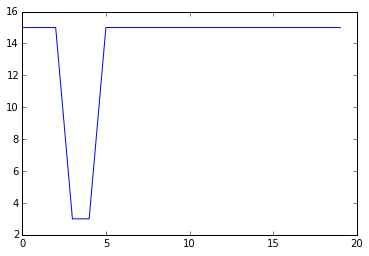

featureVec
aLeft [[ 1.2]]
aStraight [[ 0.]]
aRight [[ 0.66666667]]
piLeft 0.696926402559
piRight 0.0632237368335
piStraight 0.239849860607
sum to 1? 1.0


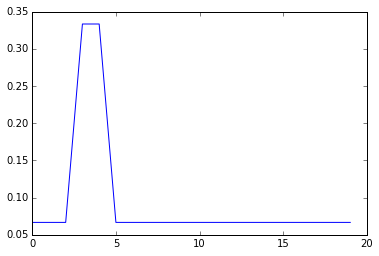

negFeatureVec
aLeft [[-1.2]]
aStraight [[ 0.]]
aRight [[-0.66666667]]
piLeft 0.0669843774651
piRight 0.738380607546
piStraight 0.194635014989
sum to 1? 1.0


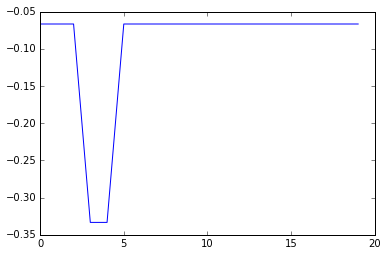

In [27]:
import numpy as np
import utils
import matplotlib.pyplot as plt
%matplotlib inline

thetaLeft      = np.zeros((20,1))
thetaLeft[:len(thetaLeft)/2] = 1
thetaLeft0     = 0.0

thetaRight     = np.zeros((20,1))
thetaRight[len(thetaLeft)/2:] = 1
thetaRight0    = 0.0

# first will see if similar to hand-designed controller
thetaStraight  = np.zeros((20,1))
thetaStraight0 = 0.0

print thetaLeft


raycasts = np.ones((20,1)) * 15.0
raycasts[3:5] = 3.0


def computeA(feature):
    aLeft = np.dot(thetaLeft.T, feature) + thetaLeft0
    aStraight = np.dot(thetaStraight.T, feature) + thetaStraight0
    aRight = np.dot(thetaRight.T, feature) + thetaRight0
    print "aLeft", aLeft
    print "aStraight", aStraight
    print "aRight", aRight
    return np.array([aLeft, aStraight, aRight])

def computePi(aVec):
    tau = 0.5
    
    denominator = 0
    for a_j in aVec:
        denominator += np.exp(a_j / tau)
        
    piVec = np.array([0.0, 0.0, 0.0])
    for idx, a_i in enumerate(aVec):
        piVec[idx] = np.exp(a_i / tau) / denominator

    print "piLeft", piVec[0]
    print "piRight", piVec[1]
    print "piStraight", piVec[2]
    
    print "sum to 1?", np.sum(piVec)
    
        
print "raycasts"
computePi(computeA(raycasts))
plt.plot(np.linspace(0,19,20), raycasts); plt.show()


featureVec = utils.inverseTruncate(raycasts, C=20, rayLength = 20)
print "featureVec"
computePi(computeA(featureVec))
plt.plot(np.linspace(0,19,20), featureVec); plt.show()


negFeatureVec = -1.0 * featureVec
print "negFeatureVec"
computePi(computeA(negFeatureVec))
plt.plot(np.linspace(0,19,20), negFeatureVec); plt.show()

1.0


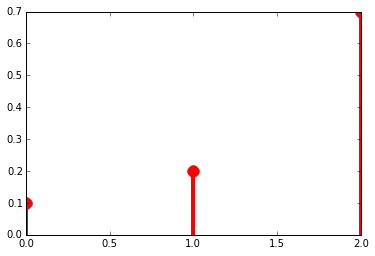

[2 2 1 2 2 0 2 2 1 2 1 0 2 2 2 1 2 2 0 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 1 2 2 1 2 2 1 2 2 0 2 2 0 2 1 2 0 2 2 2 0
 2 2 2 2 2 2 2 1 2 2 1 2 2 2 0 1 1 2 2 2 1 2 1 0 2 2]


In [37]:
from scipy import stats
xk = np.arange(3)
pk = (0.1, 0.2, 0.7)
print np.sum(pk)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

R = custm.rvs(size=100)
print R


In [25]:
np.random.seed(4)

policyTheta = np.random.randn(20,1)
raycastDistance = np.random.randn(20,1)+5

print policyTheta
print raycastDistance

print np.dot(policyTheta.T, raycastDistance)

[[ 0.05056171]
 [ 0.49995133]
 [-0.99590893]
 [ 0.69359851]
 [-0.41830152]
 [-1.58457724]
 [-0.64770677]
 [ 0.59857517]
 [ 0.33225003]
 [-1.14747663]
 [ 0.61866969]
 [-0.08798693]
 [ 0.4250724 ]
 [ 0.33225315]
 [-1.15681626]
 [ 0.35099715]
 [-0.60688728]
 [ 1.54697933]
 [ 0.72334161]
 [ 0.04613557]]
[[ 4.01700835]
 [ 5.05443274]
 [ 5.15989294]
 [ 3.79105184]
 [ 7.22336022]
 [ 5.39429521]
 [ 6.69235772]
 [ 3.88718785]
 [ 6.63574754]
 [ 3.63903441]
 [ 4.34877417]
 [ 5.54245131]
 [ 5.04800625]
 [ 2.64192637]
 [ 3.89441596]
 [ 5.83783635]
 [ 7.08787087]
 [ 5.91484096]
 [ 4.72379665]
 [ 5.7965119 ]]
[[-4.02411896]]


In [3]:
# New settings - this turns out to be pretty impressive!!
# Think it beats the hand-designed controller!!
# Runs in about 3 minutes
sim = Simulator(autoInitialize=False, verbose=False)

sim.Sarsa_numInnerBins = 9
sim.Sarsa_numOuterBins = 9

sim.randomizeControl       = True
sim.percentObsDensity      = 15
sim.nonRandomWorld         = True
sim.circleRadius           = 1.0
sim.worldScale             = 0.5
sim.supervisedTrainingTime = 3000
sim.endTime                = 9000

sim.initialize()
sim.run()

initializing world object
Finished initialization
Simulation percentage complete: ( 10  # is complete)
# ---------
## --------
### -------
#### ------
##### -----
###### ----
####### ---
######## --
######### -
playButtonFPS 20.0
Total run time 182.012824059
Ticks (Hz) 988.935812249
Number of steps taken 179999
play
play
pause
play
play
play
pause
play


In [ ]:
# New settings - these end up in the car looping around and around
sim = Simulator(autoInitialize=False)

sim.randomizeControl       = True
sim.percentObsDensity      = 5
sim.nonRandomWorld         = True
sim.circleRadius           = 2.0
sim.worldScale             = 0.5
sim.supervisedTrainingTime = 1500
sim.endTime                = 4500

sim.initialize()
sim.run()

resetting eligibility traces to zero
building stick world
boundaries done
2500.0
10
initializing world object
building robot
buidling cell locator
starting a new single simulation
counter is  0
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  38
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  435
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  694
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  711
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulatio

IndexError: index 90000 is out of bounds for axis 0 with size 90000

play


IndexError: index 90000 is out of bounds for axis 0 with size 90000

In [ ]:
# Lucas' settings
sim = Simulator(autoInitialize=False)

sim.randomizeControl       = True
sim.percentObsDensity      = 2
sim.nonRandomWorld         = True
sim.circleRadius           = 3.0
sim.worldScale             = 0.5
sim.supervisedTrainingTime = 500
sim.endTime                = 1500

sim.initialize()
sim.run()

resetting eligibility traces to zero
building stick world
boundaries done
2500.0
10
initializing world object
building robot
buidling cell locator
starting a new single simulation
counter is  0
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  38
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  435
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  694
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  711
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulatio

In [3]:
# New settings
sim = Simulator(autoInitialize=False)

sim.randomizeControl       = True
sim.percentObsDensity      = 20
sim.nonRandomWorld         = True
sim.circleRadius           = 0.7
sim.worldScale             = 1.0
sim.supervisedTrainingTime = 500
sim.endTime                = 1500

sim.initialize()
sim.run()

resetting eligibility traces to zero
building stick world
boundaries done
10000.0
166
initializing world object
building robot
buidling cell locator
starting a new single simulation
counter is  0
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  19
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  327
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  437
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulation
counter is  799
using QValue based controller =  False
resetting eligibility traces to zero
Had a collision, terminating simulation
starting a new single simulat

IndexError: index 30000 is out of bounds for axis 0 with size 30000

reached end of tape, stopping playTime


In [5]:
from ddapp.consoleapp import ConsoleApp
c = ConsoleApp()
view = c.createView()
view.show()
c.start()

In [3]:
view.show()
c.start()

In [ ]:
import os
os.system("~/drakenew/drake-distro/build/bin/ddConsoleApp simulator.py")

In [75]:
from car import CarPlant
Car = CarPlant()
print Car.state
print Car.simulate()

[ 0.  0.  0.]
Finished simulation: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  7.99999864e-01   3.33300320e-04   1.24973249e-03]
 [  1.59999593e+00   2.66530357e-03   4.99580864e-03]
 [  2.39996955e+00   8.98971593e-03   1.12288801e-02]
 [  3.19987237e+00   2.12899518e-02   1.99333701e-02]
 [  3.99961205e+00   4.15335867e-02   3.10875278e-02]
 [  4.79903820e+00   7.16662207e-02   4.46634609e-02]
 [  5.59792964e+00   1.13604877e-01   6.06272373e-02]
 [  6.39598218e+00   1.69230564e-01   7.89389564e-02]
 [  7.19279776e+00   2.40380042e-01   9.95528482e-02]
 [  7.98787481e+00   3.28836735e-01   1.22417389e-01]
 [  8.78060031e+00   4.36320800e-01   1.47475428e-01]
 [  9.57024342e+00   5.64478265e-01   1.74664336e-01]
 [  1.03559513e+01   7.14869650e-01   2.03916152e-01]
 [  1.11367466e+01   8.88957749e-01   2.35157763e-01]
 [  1.19115276e+01   1.08809509e+00   2.68311082e-01]
 [  1.26790707e+01   1.31351109e+00   3.03293241e-01]
 [  1.34380346e+01   1.56629931e+00   3.4001680

In [49]:
print Car.simulateOneStep()

[  3.99999936e-01   1.66659443e-04   1.24973963e-03]


In [34]:
# Lolz, never use numpy arange

import numpy as np
dt = 0.05
for start in range(0,10):
    t = np.arange(start, start+dt*2.0, dt)
    print t

[ 0.    0.05]
[ 1.    1.05  1.1 ]
[ 2.    2.05  2.1 ]
[ 3.    3.05  3.1 ]
[ 4.    4.05]
[ 5.    5.05]
[ 6.    6.05]
[ 7.    7.05]
[ 8.    8.05]
[ 9.    9.05]


In [38]:
# Always use numpy linspace

import numpy as np
dt = 0.05
for start in range(0,10):
    t = np.linspace(start, start+dt, 2)
    print t



[ 0.    0.05]
[ 1.    1.05]
[ 2.    2.05]
[ 3.    3.05]
[ 4.    4.05]
[ 5.    5.05]
[ 6.    6.05]
[ 7.    7.05]
[ 8.    8.05]
[ 9.    9.05]


In [38]:
import numpy as np
a = np.random.randint(0, 3, size=(100,100))
np.count_nonzero(a)

6618

In [40]:
NW = (10, 10, 0)
something = (1, 1, 1)

print tuple(np.subtract(NW, something))

(9, 9, -1)


In [64]:
A = np.array(([0.1,1.0,2.0,3.0,4.0]))
print A
print 1.0/A

[ 0.1  1.   2.   3.   4. ]
[ 10.           1.           0.5          0.33333333   0.25      ]
